# SMS-SPAM-DETECTION
In this Project we learn how to build an end-to-end meachine learning proect and here is the basic idea of project.
- we'll create a classifire that detect wather the sms is spam(fake) or not-spam(real).

**Here are the basic idea from where to start and so on:**
-  downloading data from UCI machine learning dataset.
-  Preprocess the data (get data ready for modeling).
- build a machine learning model
- save the model
- create a websie and upload on Heroku.


## 1. Data collection ( downloading data)

In [1]:
# import librarieswhat is the avg life of cats
import numpy as np
import pandas as pd

In [2]:
# read the csv file
df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3369,ham,Most of the tiime when i don't let you hug me ...,NaN,NaN,NaN
3462,ham,i am seeking a lady in the street and a freak ...,NaN,NaN,NaN
799,ham,"\Gimme a few\"" was &lt;#&gt; minutes ago""",NaN,NaN,NaN
2237,ham,"Give her something to drink, if she takes it a...",NaN,NaN,NaN
3089,ham,Am going to take bath ill place the key in win...,NaN,NaN,NaN


## Data Cleaning
Data Cleaning is the way to remove the

**In our own way data preprocessing is just removing the bad part of data and keeping the good one**

In [3]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [4]:
# the the summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


AS we can see the last three column does conatin more than 95% numll value so let's drop these column.

In [5]:
# drop last three column
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename the cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [8]:
df.tail()

,target,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
# encode the data (convert the target column betwen zero and one so our model)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check missing values
df.isnull().sum()

,0
target,0
text,0


In [12]:
# check duplicates
df.duplicated().sum()

np.int64(403)

In [13]:
# remove duplicate value
df.drop_duplicates(inplace=True)  # when we use inplace =true then our orignal data modified and we don't need to set (e.g df = ...)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# check the shape
df.shape

(5169, 2)

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to understand its patterns, relationships, and anomalies, guiding further analysis or modeling

In [16]:
df['target'].value_counts()

,count
target,
0,4516
1,653


let's draw a pie char to see it more clearly.

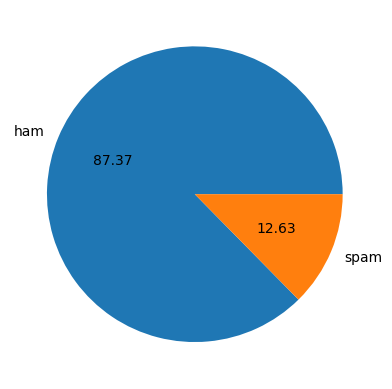

In [17]:
import matplotlib.pyplot as plt

# drwa a pie char  on targer columen to knwo the ratio of spam and ham
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

  accordint to above we know one good thing about data so when working to it mind data is **imbalanced**.

  The Next thing come in mind is to get the number of word,character and senteces.Let's start from char.

In [18]:
# num of char
df['num_of_char'] = df['text'].apply(len)

To get num of wrods and number of sentence we'll use `nltk` libaray.
- we can also get words , and sentence using python build in function but it is not 100% accuracte so get more well data we should use nltk.

In [19]:
# intstall nltk
!pip install nltk

In [20]:
# import nltk and do some pre requirments
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
# get num of words
df['num_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
# get num of sentences
df['num_of_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
# view the dataframe
df.head()

,target,text,num_of_char,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_of_char','num_of_words', 'num_of_sentences']].describe()


,num_of_char,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


**check describe(numericall analysis ) for ham and spam sepratly**

In [25]:
# ham
df[df['target'] == 0][['num_of_char','num_of_words', 'num_of_sentences']].describe()


,num_of_char,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# spam
df[df['target'] == 1][['num_of_char','num_of_words', 'num_of_sentences']].describe()

,num_of_char,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Now let's plot the hist plot for each of these column and see realtion through visualization.

In [27]:
# import req libraries
import seaborn as sns
import matplotlib.pyplot as plt

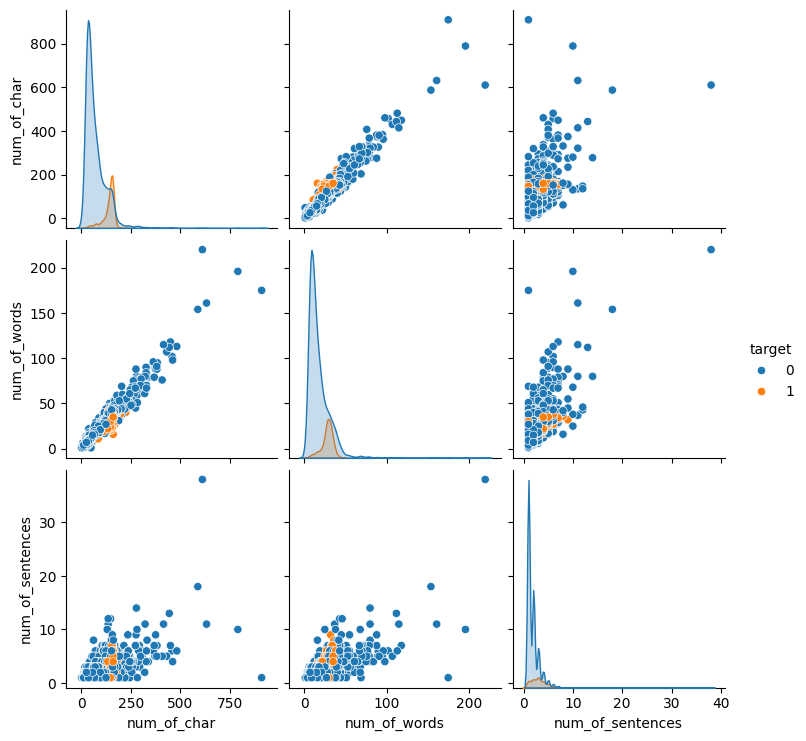

In [28]:
sns.pairplot(hue='target', data=df)

<Axes: >

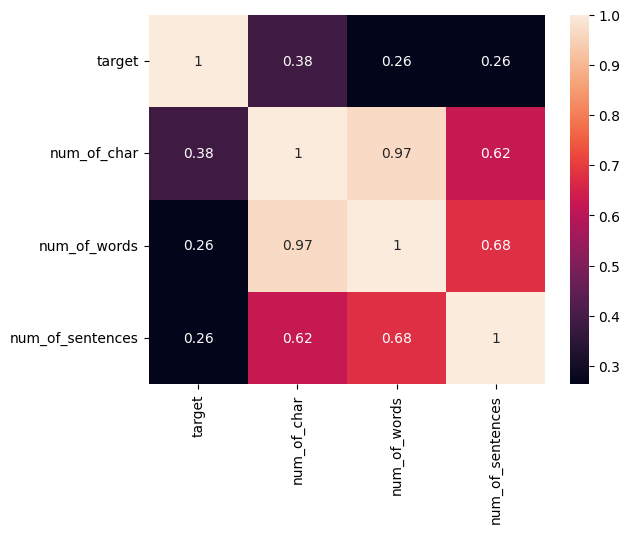

In [29]:
#TO check the correlation you just need numerical column so let's first create a numerical column then then check the correlation between tehm

numerical_df = df.select_dtypes(include=["number"])
sns.heatmap(numerical_df.corr(), annot=True)

## Text Preprocessing

- Lower Case
- Tokenization ( convert sentect into words means breaking down sentence in wrods)
- Removing special character
- removing stop word and puntuation
- stemming

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
# Instead of doing everythgn seperatly I will creat a function that done it all in once

def Transform_text(text):
  #convert all text in lowercase
  text = text.lower()

  #perform tokenizATION (WE CAN   done in two way using nltk libariy or using python built in fucntion split() let's use the libarary for more accuracy.)
  text = nltk.word_tokenize(text)

  # Removing special character.
  tem = []  #to store words temporaily

  for i in text:
    if i.isalnum():
      tem.append(i)

  # update text and clear tem
  text = tem[:]
  tem.clear()

#  Removing stopwords and puntuation.
  from string import punctuation
  stopwords = nltk.corpus.stopwords.words('english')
  for i in text:
    if i not in stopwords and i not in punctuation:
      tem.append(i)

# update again
  text = tem[:]
  tem.clear()

# Perform steming
  from nltk.stem import PorterStemmer
  ps = PorterStemmer()
  for i in text:
    tem.append(ps.stem(i))

  #update again
  text = tem[:]
  tem.clear()


# REtrun transform text
  return " ".join(text)


In [32]:
Transform_text('HI i am learning NLp! ? and i am wahab')

'hi learn nlp wahab'

In [33]:
# let's apply that funtion to over orignal data set
df['Transformer_text'] = df['text'].apply(Transform_text)

In [34]:
df.head()

,target,text,num_of_char,num_of_words,num_of_sentences,Transformer_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
# import libariy
import matplotlib.pyplot as plt
from wordcloud import wordcloud
wc = wordcloud.WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [36]:
# for spam
spam_wc = wc.generate(df[df['target'] == 1]['Transformer_text'].str.cat(sep=""))

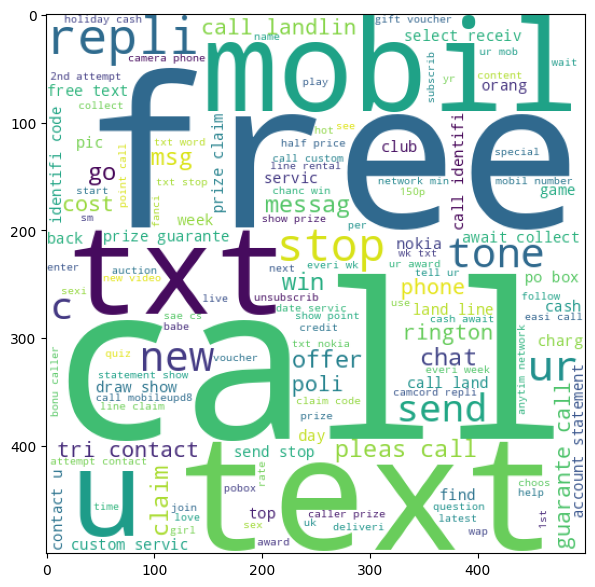

In [37]:
plt.figure(figsize=(10, 7))
plt.imshow(spam_wc)

In [38]:
# for ham
ham_wc = wc.generate(df[df['target'] == 0]['Transformer_text'].str.cat(sep=""))

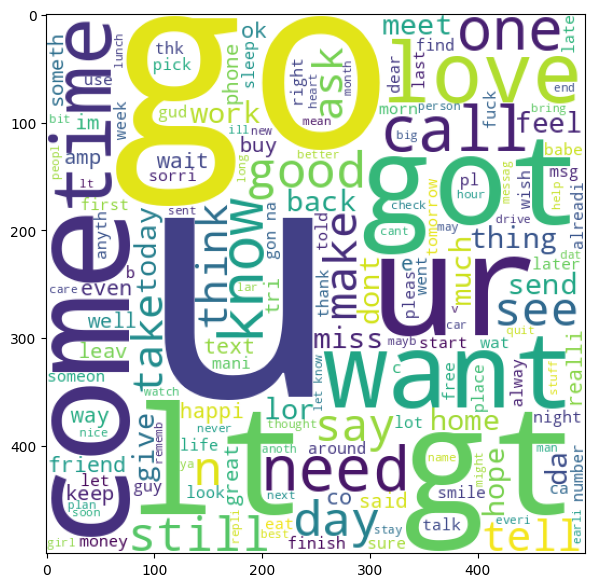

In [39]:
plt.figure(figsize=(10, 7))
plt.imshow(ham_wc)

**from this we can cleary saw the common msg of ham and spam but for understanding purpose let's get the top 30 most used wrod of ham and spam**
: for this we have to few simple steps.

In [40]:
# let's start with spam
spam_corpus = []
for msg in df[df['target'] == 1]['Transformer_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

<ipython-input-42-9b31df3de860>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_word_df, x='Word', y='Frequency',  palette='viridis')


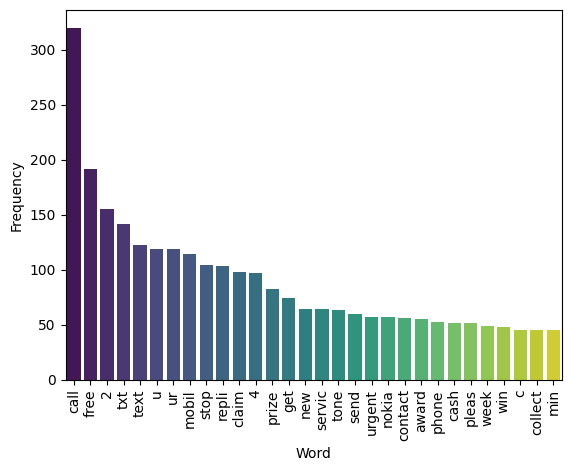

In [42]:
from collections import Counter
import pandas as pd

# Assuming spam_corpus is a list of words
word_counts = Counter(spam_corpus)

# Get the 30 most common words
most_common_words = word_counts.most_common(30)

# Create a DataFrame from the list of tuples
spam_word_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# plot to show
sns.barplot(data=spam_word_df, x='Word', y='Frequency',  palette='viridis')
plt.xticks(rotation=90)
plt.show()


In [43]:
# let's do the same thign for ham
ham_corpus = []
for msg in df[df['target'] == 0]['Transformer_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [44]:
len(ham_corpus)

35404

<ipython-input-45-1aa57056eee6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_word_df, x='Word', y='Frequency',  palette='viridis')


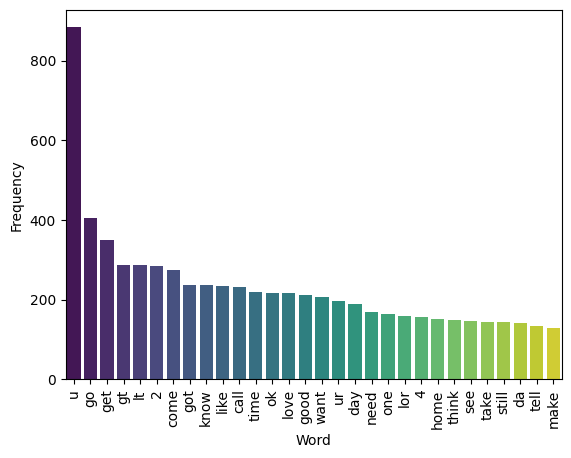

In [45]:
# Assuming spam_corpus is a list of words
word_counts = Counter(ham_corpus)

# Get the 30 most common words
most_common_words = word_counts.most_common(30)

# Create a DataFrame from the list of tuples
ham_word_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# plot to show
sns.barplot(data=ham_word_df, x='Word', y='Frequency',  palette='viridis')
plt.xticks(rotation=90)
plt.show()


## Model Building

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [83]:
X = tfidf.fit_transform(df['Transformer_text']).toarray()

In [84]:
X.shape

(5169, 3000)

In [85]:
y = df['target'].values

In [86]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
# let's slit the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=2)

In [88]:
# import naive base model
from sklearn.naive_bayes import MultinomialNB , BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score

In [89]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [90]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print("Confusion_matrix: \n",  confusion_matrix(y_test, y_pred1))
print("Precision_score: ", precision_score(y_test, y_pred1))

Accuracy Score:  0.9709864603481625
Confusion_matrix: 
 [[896   0]
 [ 30 108]]
Precision_score:  1.0


In [91]:
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print("Confusion_matrix: \n",  confusion_matrix(y_test, y_pred2))
print("Precision_score: ", precision_score(y_test, y_pred2))

Accuracy Score:  0.9835589941972921
Confusion_matrix: 
 [[895   1]
 [ 16 122]]
Precision_score:  0.991869918699187


In [92]:
gnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Confusion_matrix: \n",  confusion_matrix(y_test, y_pred3))
print("Precision_score: ", precision_score(y_test, y_pred3))

Accuracy Score:  0.874274661508704
Confusion_matrix: 
 [[790 106]
 [ 24 114]]
Precision_score:  0.5181818181818182


**From our case Precision score matter most beaucse `Avoiding False Alarms (False Positives) False Positive = A good (ham) message marked as spam` so we'll go with mnb(MultinomailNB) beacuse it's precision score is 1.**


- let's compare some other calsfication model with MultinomailNB  in our case mnb

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [95]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "xgb": xgb

}

In [96]:
from sklearn.metrics import accuracy_score, precision_score  # Make sure these are imported

def train_classfire(clfs, X_train, y_train, X_test, y_test):
  clfs.fit(X_train, y_train)
  y_pred = clfs.predict(X_test)

  # Use the imported functions, not variables that might have plt.figure(figsize=(10, 7shadowed them
  return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)

In [97]:
train_classfire(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [98]:
train_classfire(knc, X_train, y_train, X_test, y_test)

(0.9052224371373307, 1.0)

In [99]:
accuracy_scores = []
precision_scores =[]

for name, clf in clfs.items():
  print(f"Training Classifier: {name}")
  # Assign results to different variable names
  acc_score, prec_score = train_classfire(clf, X_train, y_train, X_test, y_test)
  print(f"Accuracy Score: {acc_score}")
  print(f"Precision Score: {prec_score}")
  accuracy_scores.append(acc_score)
  precision_scores.append(prec_score)

Training Classifier: SVC
Accuracy Score: 0.9758220502901354
Precision Score: 0.9747899159663865
Training Classifier: KN
Accuracy Score: 0.9052224371373307
Precision Score: 1.0
Training Classifier: NB
Accuracy Score: 0.9709864603481625
Precision Score: 1.0
Training Classifier: DT
Accuracy Score: 0.9332688588007737
Precision Score: 0.8415841584158416
Training Classifier: LR
Accuracy Score: 0.9555125725338491
Precision Score: 0.96
Training Classifier: RF
Accuracy Score: 0.9738878143133463
Precision Score: 0.9826086956521739
Training Classifier: AdaBoost
Accuracy Score: 0.9216634429400387
Precision Score: 0.8202247191011236
Training Classifier: BgC
Accuracy Score: 0.9584139264990329
Precision Score: 0.8682170542635659
Training Classifier: ETC
Accuracy Score: 0.9748549323017408
Precision Score: 0.9745762711864406
Training Classifier: GBDT
Accuracy Score: 0.9506769825918762
Precision Score: 0.9306930693069307
Training Classifier: xgb
Accuracy Score: 0.965183752417795
Precision Score: 0.93965

In [100]:
Performance_df = pd.DataFrame({'Models': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(by= 'Precision', ascending=False)

In [101]:
Performance_df

,Models,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584


<Figure size 1000x700 with 0 Axes>

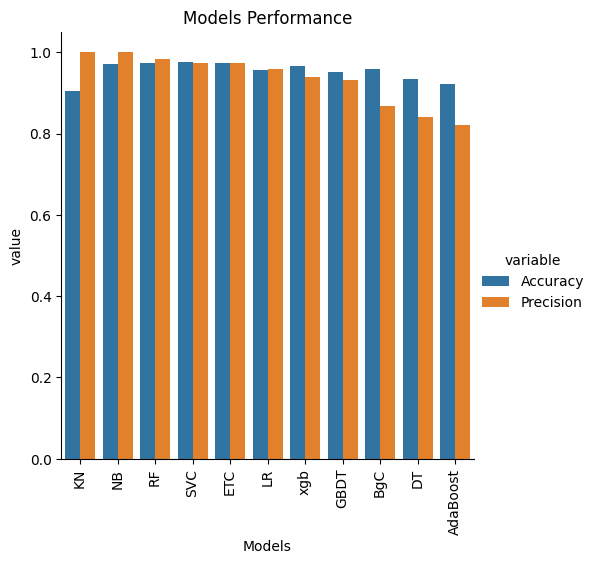

In [102]:
plt.figure(figsize=(10, 7))
sns.catplot(x="Models", y='value', hue='variable', data=pd.melt(Performance_df, id_vars='Models', value_vars=['Accuracy', 'Precision']), kind='bar')
plt.title("Models Performance")
plt.xticks(rotation=90)
plt.show()

**In our case precision naive besd is perfomfing best so now we can go with naive base for model.**

we Select  `MultinomialNB` with `accuracy: 97` and `precision: 1`

In [103]:
import pickle
pickle.dump(tfidf, open("Vectorizer.pkl", "wb"))
pickle.dump(mnb, open("Model.pkl", "wb"))